In [1]:
#Import packages

import matplotlib.pyplot as plt
import random
import numpy as np
load('NumericalSemigroup.sage')


true
Successfully loaded Singular


In [2]:
#Test NumericalSemigroup Package
McNuggets = NumericalSemigroup([6,9,20])
print(McNuggets.FrobeniusNumber())
print(McNuggets.LengthSet(400))
print(McNuggets.DeltaSet(400))
print(McNuggets.OmegaPrimality(400))
print(McNuggets.CatenaryDegree(400))
load('KunzPoset.sage')
load('PlotKunzPoset.sage')
PlotKunzPoset([6,9,20])
PlotKunzPoset([5,6,9])
McNuggets.KunzCoordinates()


43
[20, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]
{1, 4}
70
7


[8, 3, 1, 6, 4]

In [251]:
NumericalSemigroup([6,9,20]).gens

[6, 9, 20]

In [252]:
# Estimate function in Expected Frobenious numbers
def estimate(generators, n):
    return ((factorial(n - 1) * prod(generators)) ^ (1 / (n - 1))).n()

# Generates random sample using erdos-renyi model 
def generate_sample(M, p, sample_size):
    semigroups = []
    for j in range(sample_size):
        generators = []
        for i in range(M):
            if random.random() < p:
                generators.append(i)
        if gcd(generators) != 1:
            continue
        semigroups.append(NumericalSemigroup(generators))
    semigroups
    return semigroups
             
def frobenius_numbers(semigroups):
    return [semigroup.FrobeniusNumber() for semigroup in semigroups]

def embedding_dims(semigroups):
    return [len(semigroup.gens) for semigroup in semigroups]



15.764


(array([ 27.,  70., 173., 136., 186., 229., 102.,  65.,  11.,   1.]),
 array([ 1. ,  4.4,  7.8, 11.2, 14.6, 18. , 21.4, 24.8, 28.2, 31.6, 35. ]),
 <BarContainer object of 10 artists>)

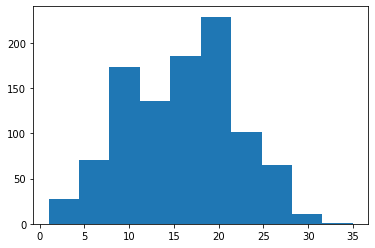

In [263]:
data = embedding_dims(generate_sample(25000, 0.01, 1000))
print(np.mean(data))
plt.hist(data)

1555.346


(array([188., 229., 224., 173., 106.,  40.,  24.,   6.,   5.,   5.]),
 array([-1.0000e+00,  6.0220e+02,  1.2054e+03,  1.8086e+03,  2.4118e+03,
         3.0150e+03,  3.6182e+03,  4.2214e+03,  4.8246e+03,  5.4278e+03,
         6.0310e+03]),
 <BarContainer object of 10 artists>)

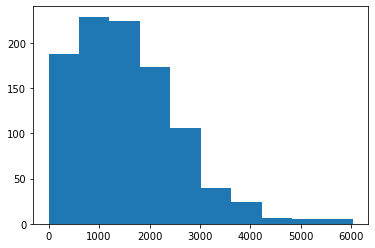

In [292]:
data = frobenius_numbers(generate_sample(25000, 0.01, 1000))
print(np.mean(data))
plt.hist(data)

In [277]:
lower_bound_g = lambda p : ((6 - 14*p + 11*p^2 + 3*p^2)/(2*p - 2*p^3 - p^4)).n()
upper_bound_g = lambda p : ((1 - p)*(2 - p^2)/(p^2)).n()


In [290]:
p = 0.01
print(lower_bound_g(p), upper_bound_g(p))

293.099456495378 19799.0100000000
